In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('training_data3.csv', parse_dates=['Start Date', 'End Date'], dayfirst=True)

In [17]:
df['Duration'] = (df['End Date'] - df['Start Date']).dt.days

# Display the first few rows to verify the new column
print(df.head())


              Topic  Trainee Count         Level Start Date   End Date  \
0         ML Basics             15      advanced 2023-01-11 2023-01-19   
1         ML Basics             42         basic 2023-07-18 2023-07-20   
2        Full Stack             56  intermediate 2021-03-14 2021-03-20   
3   Cloud Platforms             27      advanced 2023-01-23 2023-01-31   
4  Data Engineering             70  intermediate 2023-06-10 2023-06-17   

   Duration  
0         8  
1         2  
2         6  
3         8  
4         7  


In [18]:
df.head()


,Topic,Trainee Count,Level,Start Date,End Date,Duration
0,ML Basics,15,advanced,2023-01-11,2023-01-19,8
1,ML Basics,42,basic,2023-07-18,2023-07-20,2
2,Full Stack,56,intermediate,2021-03-14,2021-03-20,6
3,Cloud Platforms,27,advanced,2023-01-23,2023-01-31,8
4,Data Engineering,70,intermediate,2023-06-10,2023-06-17,7


In [19]:
# dropping start date and end date
df = df.drop(['Start Date', 'End Date'], axis=1)

In [20]:
df

,Topic,Trainee Count,Level,Duration
0,ML Basics,15,advanced,8
1,ML Basics,42,basic,2
2,Full Stack,56,intermediate,6
3,Cloud Platforms,27,advanced,8
4,Data Engineering,70,intermediate,7
...,...,...,...,...
995,Python & Web Scraping,44,basic,4
996,ADF,52,intermediate,5
997,Power BI,38,intermediate,5
998,Data Warehouse - ETL,34,intermediate,5


## EDA

In [21]:
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore unique values in categorical columns
print(df['Topic'].unique())
print(df['Level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Topic          1000 non-null   object
 1   Trainee Count  1000 non-null   int64 
 2   Level          1000 non-null   object
 3   Duration       1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None
       Trainee Count    Duration
count    1000.000000  1000.00000
mean       45.521000     5.79500
std        20.063651     2.79227
min        10.000000     1.00000
25%        29.000000     3.00000
50%        47.000000     6.00000
75%        63.000000     8.00000
max        80.000000    10.00000
Topic            0
Trainee Count    0
Level            0
Duration         0
dtype: int64
['ML Basics' 'Full Stack' 'Cloud Platforms' 'Data Engineering'
 'Python for DS' 'Python & Web Scraping' 'DBT' 'Git & Version Control'
 'DevOps Operations' 'ADF' 'Data Warehouse - ETL' 'DBMS' 'SQL

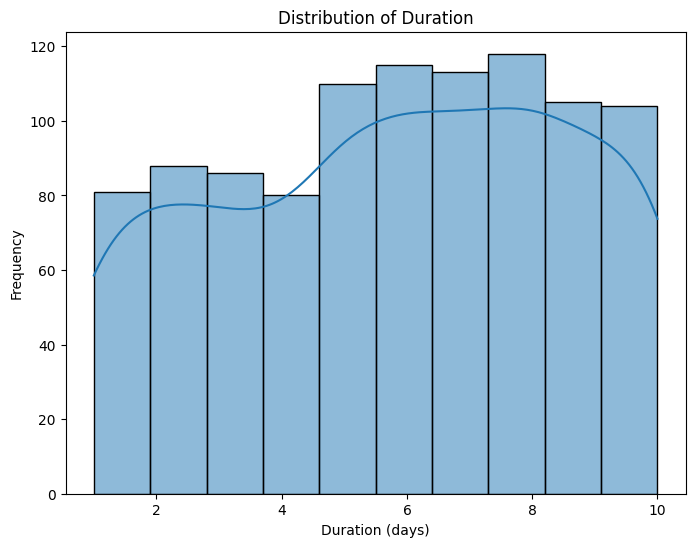

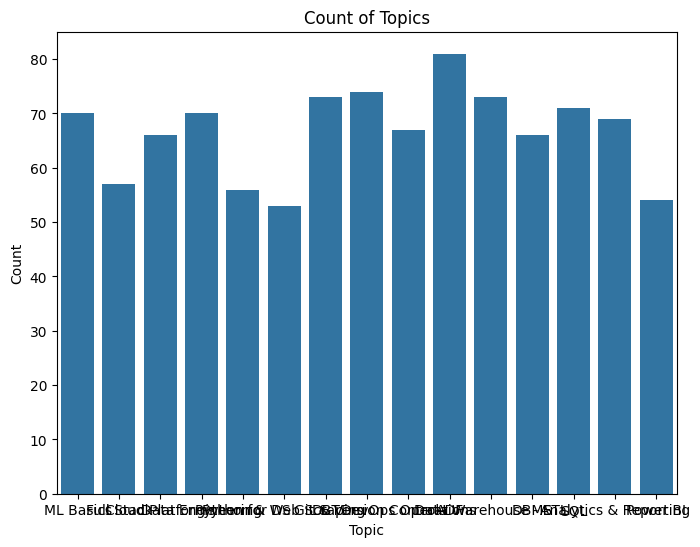

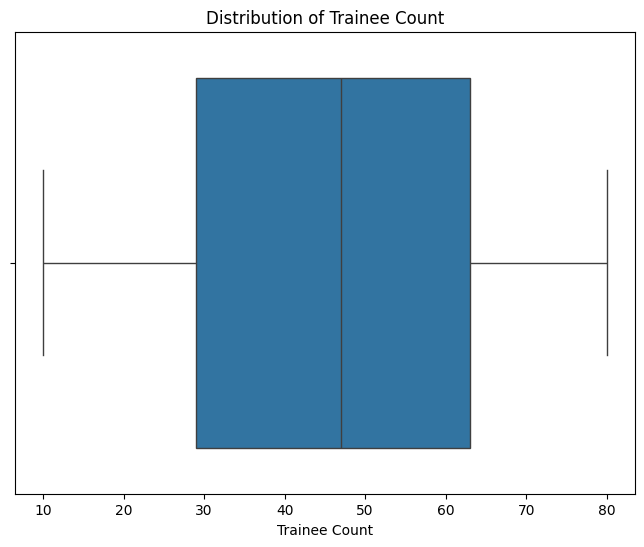

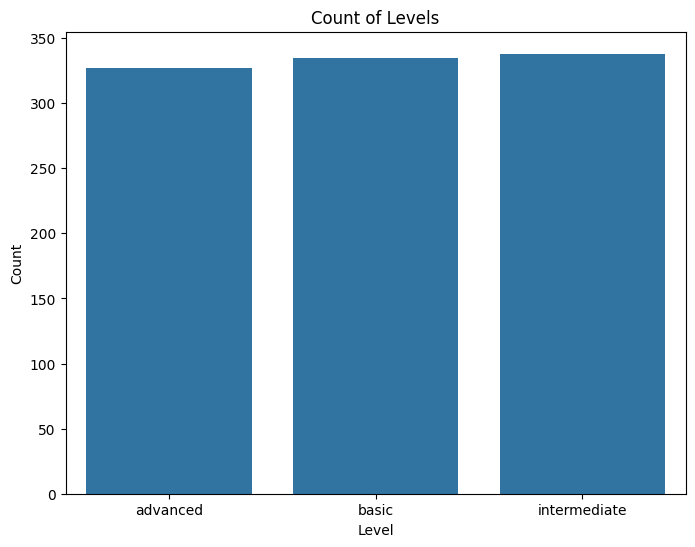

In [22]:
# graphical analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=10, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

# 2. Count of each 'Topic'
plt.figure(figsize=(8, 6))
sns.countplot(x='Topic', data=df)
plt.title('Count of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# 3. Distribution of 'Trainee Count'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Trainee Count', data=df)
plt.title('Distribution of Trainee Count')
plt.xlabel('Trainee Count')
plt.show()

# 4. Count of each 'Level'
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df)
plt.title('Count of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

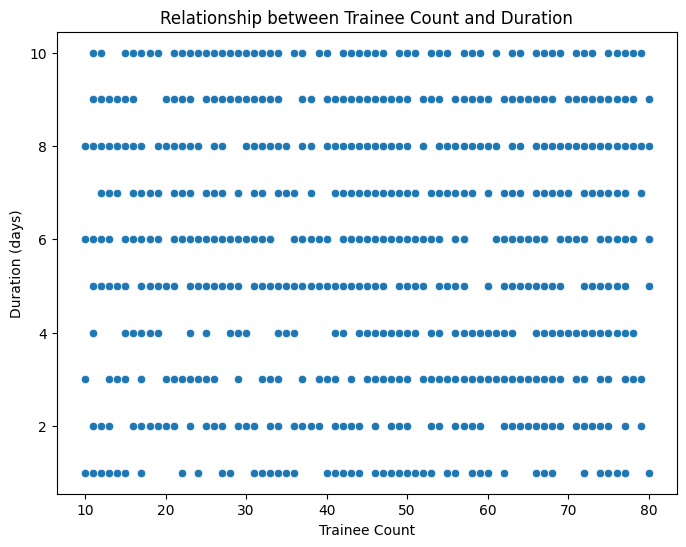

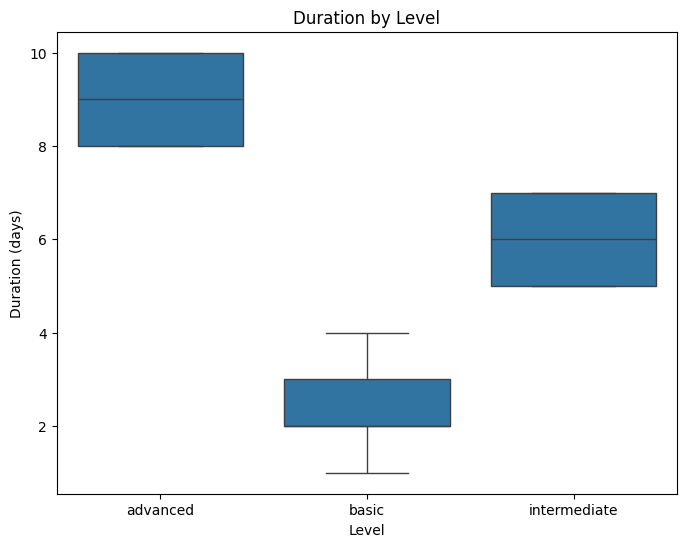

Text(0.5, 1.02, 'Pairplot of Numerical Variables')

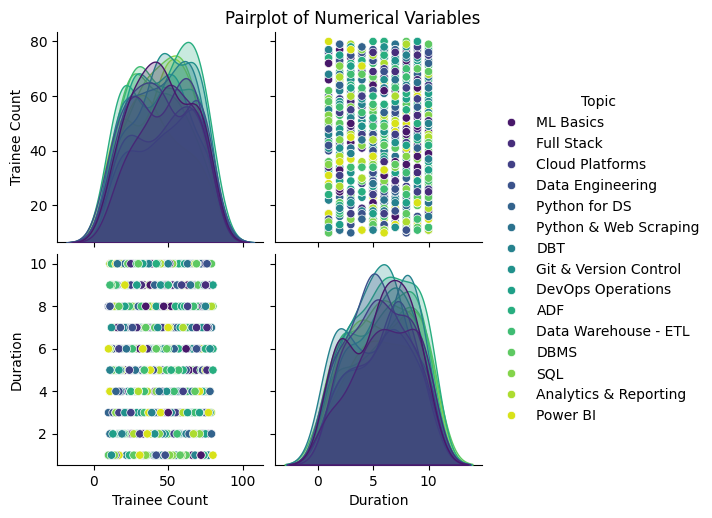

In [24]:
# Bivariate Analysis
# 5. Relationship between 'Trainee Count' and 'Duration'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Trainee Count', y='Duration', data=df)
plt.title('Relationship between Trainee Count and Duration')
plt.xlabel('Trainee Count')
plt.ylabel('Duration (days)')
plt.show()

# 6. Box plot of 'Duration' grouped by 'Level'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='Duration', data=df)
plt.title('Duration by Level')
plt.xlabel('Level')
plt.ylabel('Duration (days)')
plt.show()

# Multivariate Analysis
# 7. Pairplot for numerical variables
sns.pairplot(df, hue='Topic', palette='viridis')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)

## Feature Engieering

In [25]:
from sklearn.preprocessing import LabelEncoder

In [28]:

# Initialize LabelEncoder for categorical variables
label_encoders = {}

# Encode 'Topic'
topic_encoder = LabelEncoder()
df['Topic_Encoded'] = topic_encoder.fit_transform(df['Topic'])
label_encoders['Topic'] = dict(zip(topic_encoder.classes_, topic_encoder.transform(topic_encoder.classes_)))

# Encode 'Level'
level_encoder = LabelEncoder()
df['Level_Encoded'] = level_encoder.fit_transform(df['Level'])
label_encoders['Level'] = dict(zip(level_encoder.classes_, level_encoder.transform(level_encoder.classes_)))

# Display the DataFrame with encoded columns
print("\nDataFrame with Encoded Columns:")
print(df)

# Display the encoding mappings
print("\nEncoding Mappings:")
print(label_encoders)

# Create a copy of the DataFrame with encoded columns and target variable
encoded_df = df[['Topic_Encoded', 'Level_Encoded', 'Duration']].copy()

# Display the new DataFrame
print("\nDataFrame with Encoded Columns and Target Variable:")
print(encoded_df)


DataFrame with Encoded Columns:
                     Topic  Trainee Count         Level  Duration  \
0                ML Basics             15      advanced         8   
1                ML Basics             42         basic         2   
2               Full Stack             56  intermediate         6   
3          Cloud Platforms             27      advanced         8   
4         Data Engineering             70  intermediate         7   
..                     ...            ...           ...       ...   
995  Python & Web Scraping             44         basic         4   
996                    ADF             52  intermediate         5   
997               Power BI             38  intermediate         5   
998   Data Warehouse - ETL             34  intermediate         5   
999   Data Warehouse - ETL             56         basic         2   

     Topic_Encoded  Level_Encoded  
0               10              0  
1               10              1  
2                8            

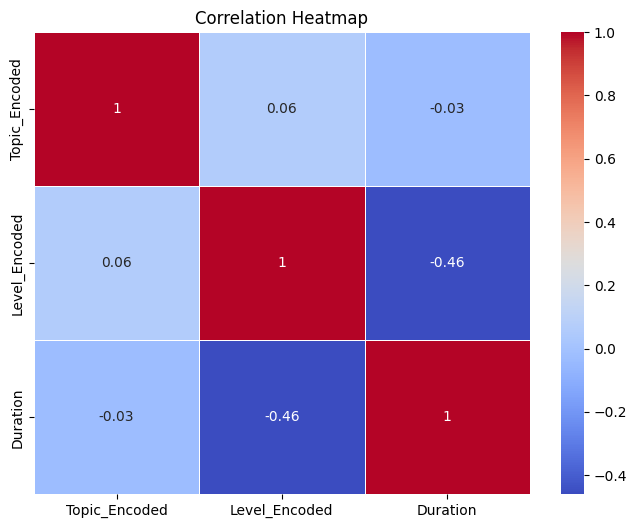

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_df.corr(method = "spearman"), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Model Selection

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming 'encoded_df' is your DataFrame with encoded columns and target variable
# Splitting the data into features (X) and target (y)
X = encoded_df.drop('Duration', axis=1)
y = encoded_df['Duration']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

results = {}

# Fit models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2}

# Display results
print("Performance of Regression Models:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"  RMSE: {result['RMSE']:.2f}")
    print(f"  R2 Score: {result['R2']:.4f}")
    print()


Performance of Regression Models:
Model: Linear Regression
  RMSE: 2.56
  R2 Score: 0.1770

Model: Decision Tree Regression
  RMSE: 0.97
  R2 Score: 0.8827

Model: Random Forest Regression
  RMSE: 0.97
  R2 Score: 0.8829

Model: Gradient Boosting Regression
  RMSE: 0.95
  R2 Score: 0.8875

Model: Support Vector Regression
  RMSE: 2.53
  R2 Score: 0.1953



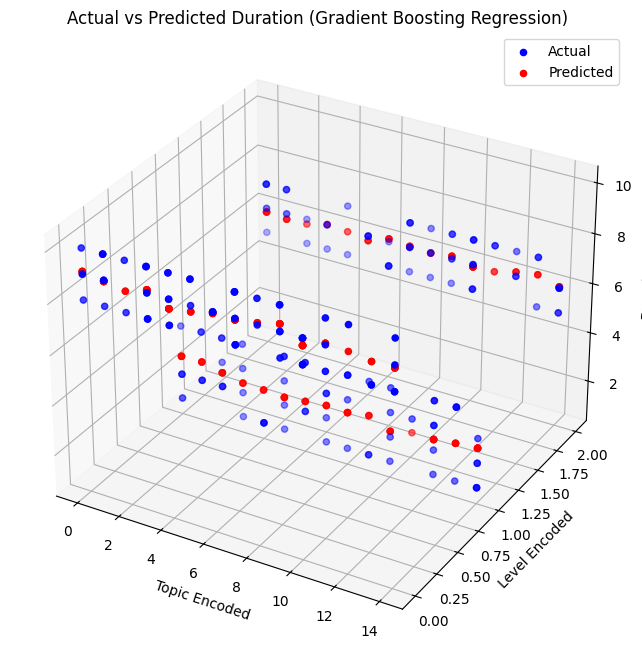

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming 'encoded_df' is your DataFrame with encoded columns and target variable
# Splitting the data into features (X) and target (y)
X = encoded_df.drop('Duration', axis=1)
y = encoded_df['Duration']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate RMSE and R2 score
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Create a 3D scatter plot for actual vs predicted vs index
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual vs predicted vs index
ax.scatter(X_test['Topic_Encoded'], X_test['Level_Encoded'], y_test, color='blue', label='Actual')
ax.scatter(X_test['Topic_Encoded'], X_test['Level_Encoded'], y_pred, color='red', label='Predicted')

# Set labels and title
ax.set_xlabel('Topic Encoded')
ax.set_ylabel('Level Encoded')
ax.set_zlabel('Duration')
ax.set_title('Actual vs Predicted Duration (Gradient Boosting Regression)')

# Add legend
ax.legend()

# Show plot
plt.show()
